In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bop_utils import *

# line plot 그리기
- 가장 많이 사용하는 그래프

<목차>
1. ax.plot(y)
2. ax.plot(x, y)
3. several line plots on one ax
4. several line plots on different axes
5. ax.axvline, ax.axhline
6. labels, legends
7. line styles, markers

## 1) ax.plot(y) 
- x축 레이블은 데이터의 인덱스를 의미한다.

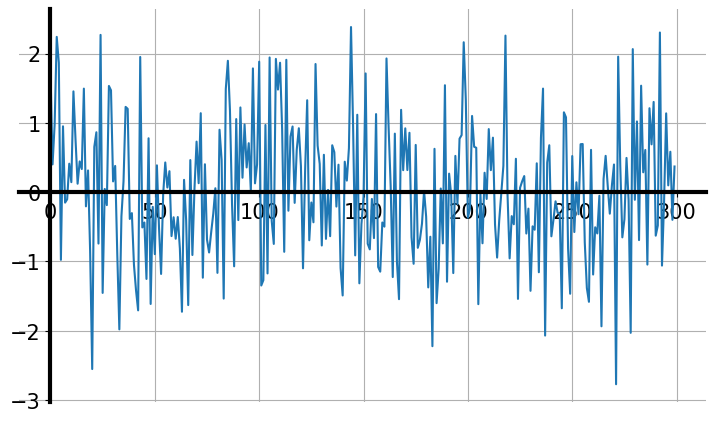

In [2]:
np.random.seed(0)
y_data = np.random.normal(0, 1, (300, ))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(y_data)

fig.tight_layout(pad=3)

x_ticks = np.arange(301, step=50)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize=15)

ax.grid()

for spine_loc, spine in ax.spines.items():
    spine.set_linewidth(3)
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_position(('data', 0))

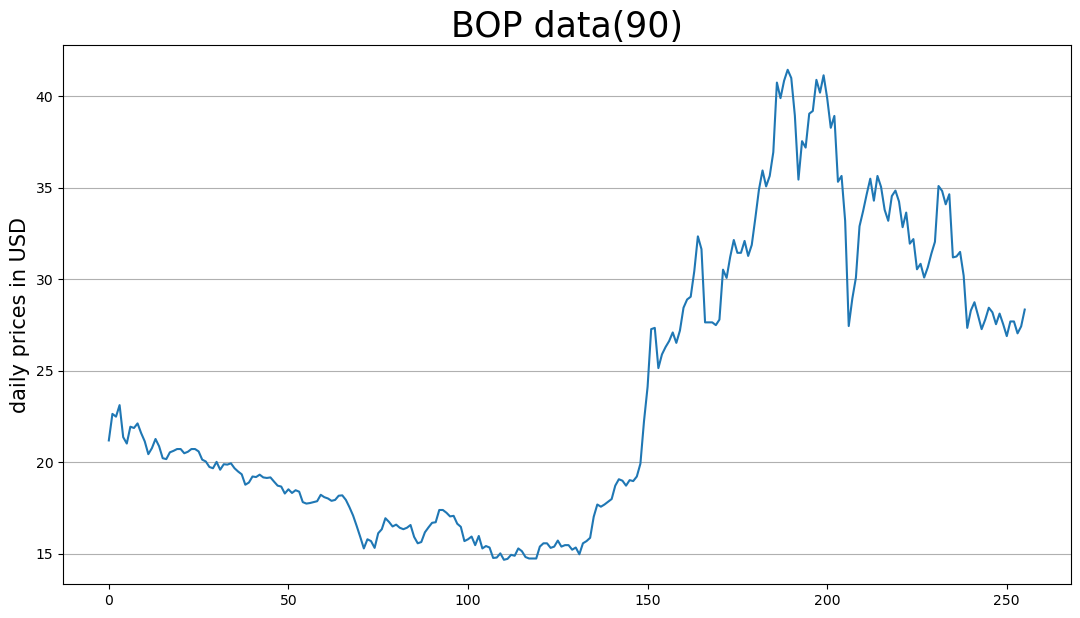

In [3]:
# 브렌트오일 가격 데이터 불러오기
data = bop_data_reader()
t_year = 90

tyear_data = get_tyear_data(data, t_year)

# xtick label은 고려 X
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(tyear_data[:, -1])

ax.set_title('BOP data({})'.format(t_year), fontsize=25)
ax.set_ylabel('daily prices in USD', fontsize=15)
ax.tick_params(labelsize=10)

ax.grid(axis='y')

## 2) ax.plot(x, y)
- x가 등간격이 아니어도 된다.

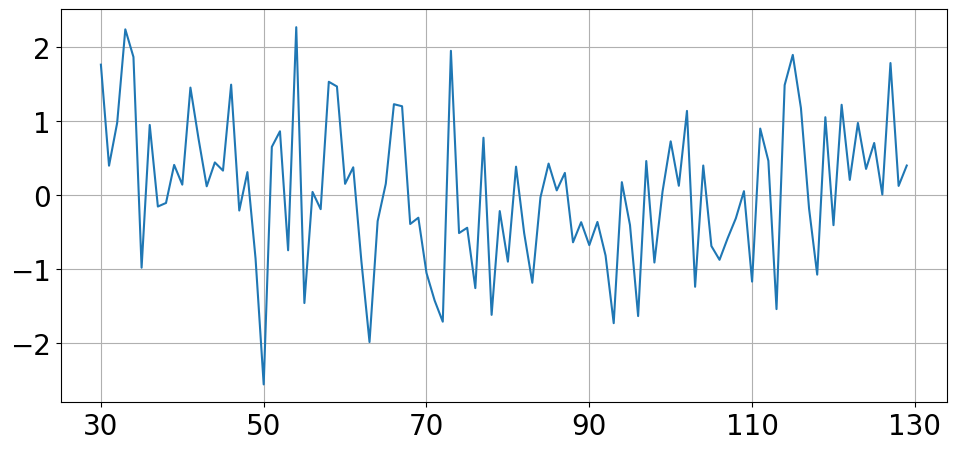

In [4]:
np.random.seed(0)

n_data = 100
s_idx = 30
x_data = np.arange(s_idx, s_idx + n_data)
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data, y_data)

fig.tight_layout(pad=3)

x_ticks = np.arange(s_idx, s_idx + n_data + 1, 20)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize=20)

ax.grid()

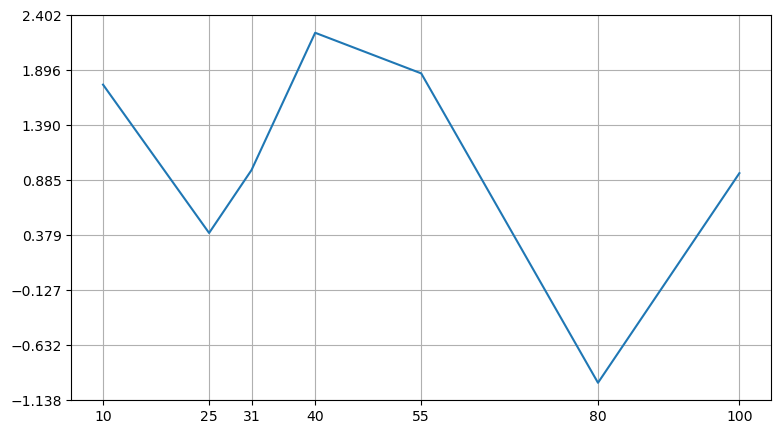

In [5]:
np.random.seed(0)

x_data = np.array([10, 25, 31, 40, 55, 80, 100])
y_data = np.random.normal(0, 1, (7, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data, y_data)

fig.subplots_adjust(left=.2)

ax.set_xticks(x_data)
ylim = ax.get_ylim()
y_ticks = np.linspace(ylim[0], ylim[1], 8)
ax.set_yticks(y_ticks)
ax.tick_params(labelsize=10)

ax.grid()

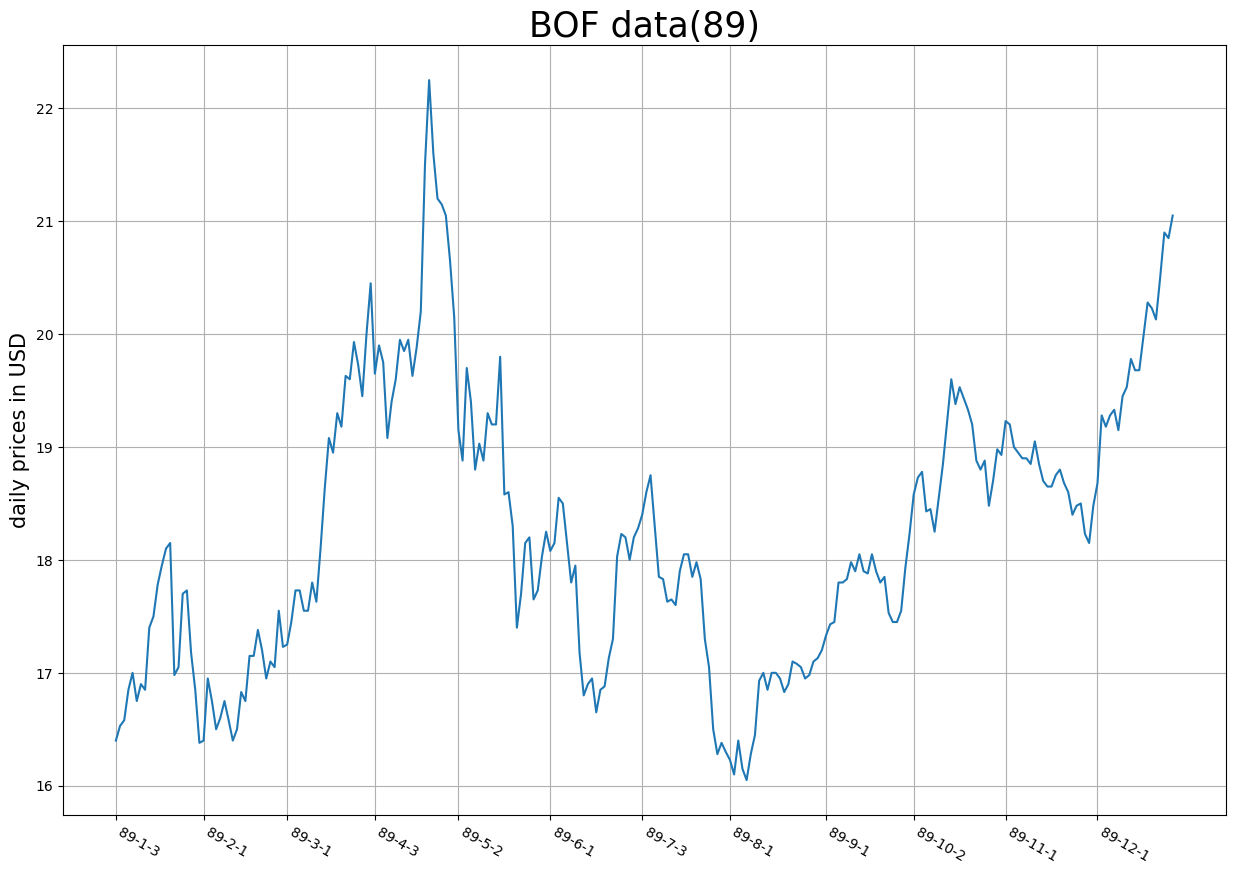

In [6]:
# 브렌트오일 가격 데이터 불러오기
data = bop_data_reader()
t_year = 89

tyear_data = get_tyear_data(data, t_year)

fig, ax = plt.subplots(figsize=(15, 10))

# 🔥
month_dic = {m: None for m in range(1, 13)}
for idx, data in enumerate(tyear_data):
    Y, M, D, price = data
    if month_dic[M] is None:
        month_dic[M] = [idx, '-'.join(str(int(i)) for i in [Y, M, D])]

first_day_labels = np.array(list(month_dic.values()))

x_arange = np.arange(tyear_data.shape[0])
ax.plot(x_arange, tyear_data[:, -1])

# ✅ xtick 설정
ax.set_xticks(first_day_labels[:, 0].astype(int))
ax.set_xticklabels(first_day_labels[:, 1], rotation=-30, ha='left')
ax.tick_params(labelsize=10)

ax.set_title('BOF data({})'.format(t_year), fontsize=25)
ax.set_ylabel('daily prices in USD', fontsize=15)

ax.grid()

## 3) several line plots on one ax
- 서로 다른 그래프를 겹쳐서 그릴 수 있다.
- 동일한 범위의 tick, ticklabel 설정을 위해서 파이썬을 잘 다뤄야 한다.

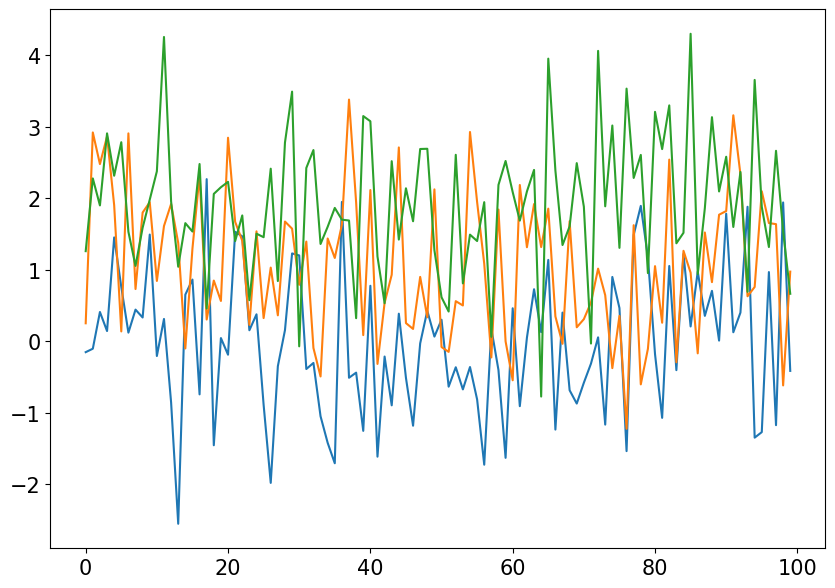

In [7]:
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(random_noise1)
ax.plot(random_noise2)
ax.plot(random_noise3)

ax.tick_params(labelsize=15)

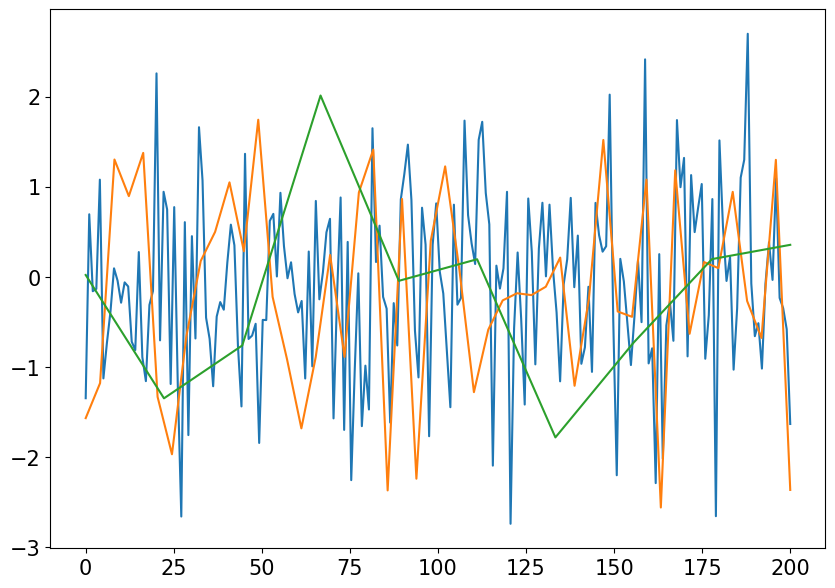

In [8]:
n_data1, n_data2, n_data3 = 200, 50, 10

x_data1 = np.linspace(0, 200, n_data1)
x_data2 = np.linspace(0, 200, n_data2)
x_data3 = np.linspace(0, 200, n_data3)

random_noise1 = np.random.normal(0, 1, (n_data1, ))
random_noise2 = np.random.normal(0, 1, (n_data2, ))
random_noise3 = np.random.normal(0, 1, (n_data3, ))

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x_data1, random_noise1)
ax.plot(x_data2, random_noise2)
ax.plot(x_data3, random_noise3)

ax.tick_params(labelsize=15)

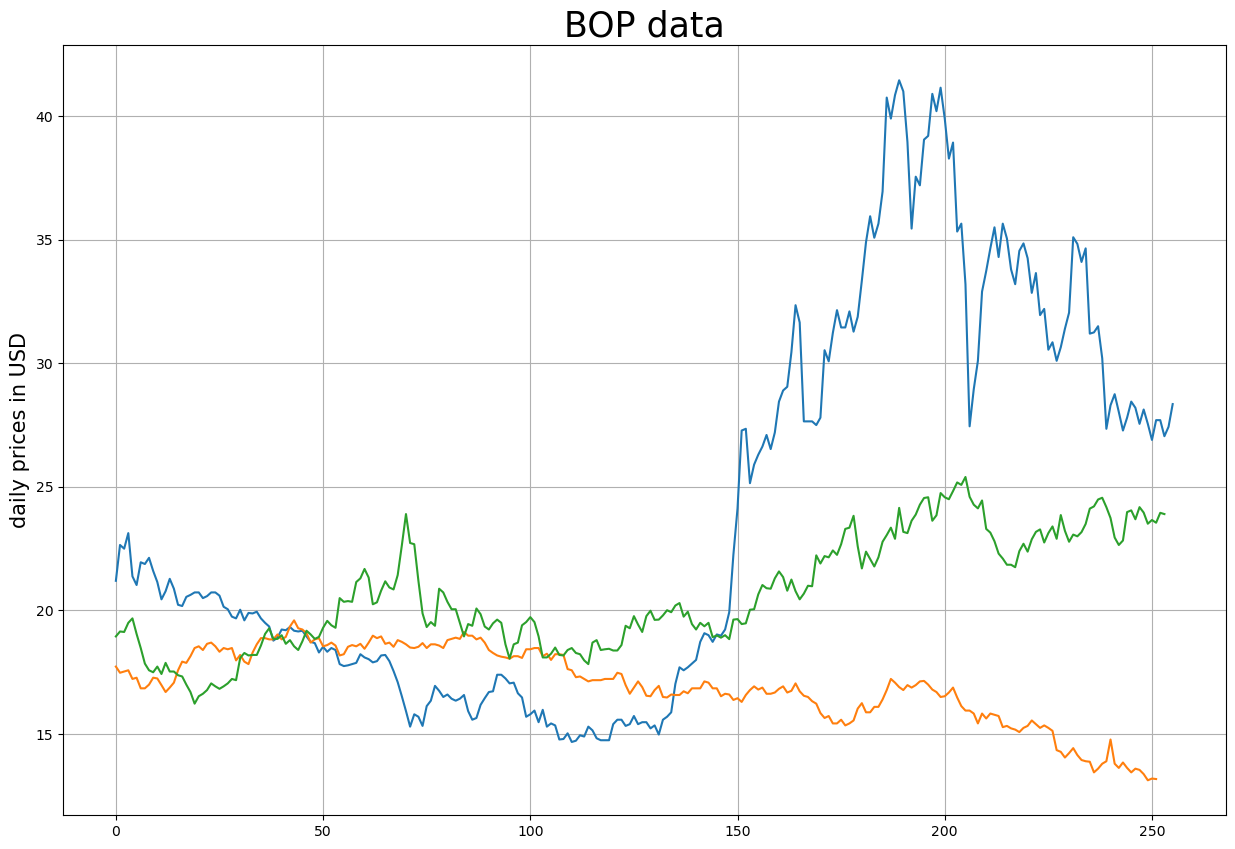

In [9]:
def bop_plot(dataset, t_year, ax):
    tyear_data = get_tyear_data(dataset, t_year)
    ax.plot(tyear_data[:, -1])

data = bop_data_reader()
fig, ax = plt.subplots(figsize=(15, 10))

bop_plot(data, 90, ax)
bop_plot(data, 93, ax)
bop_plot(data, 96, ax)

ax.set_title('BOP data', fontsize=25)
ax.set_ylabel('daily prices in USD', fontsize=15)
ax.tick_params(labelsize=10)

ax.grid()

## 4) several line plots on different axes

In [10]:
# 🔥 커스텀 함수
def bop_plot(dataset, t_year, ax):
    tyear_data = get_tyear_data(dataset, t_year).astype(int)
    
    month_dic = {m: None for m in range(1, 13)}
    for idx, data in enumerate(tyear_data):
        Y, M, D, price = data
        if month_dic[M] is None:
            month_dic[M] = [idx, '-'.join(str(i) for i in [Y, M, D])]
            
    first_day_labels = np.array(list(month_dic.values()))
    
    x_arange = np.arange(tyear_data.shape[0])
    ax.plot(x_arange, tyear_data[:, -1])
    ax.set_xticks(first_day_labels[:, 0].astype(int))
    ax.set_xticklabels(first_day_labels[:, 1], rotation=-30, ha='left')
    
    ax.tick_params(labelsize=10)
    
    ax.grid()

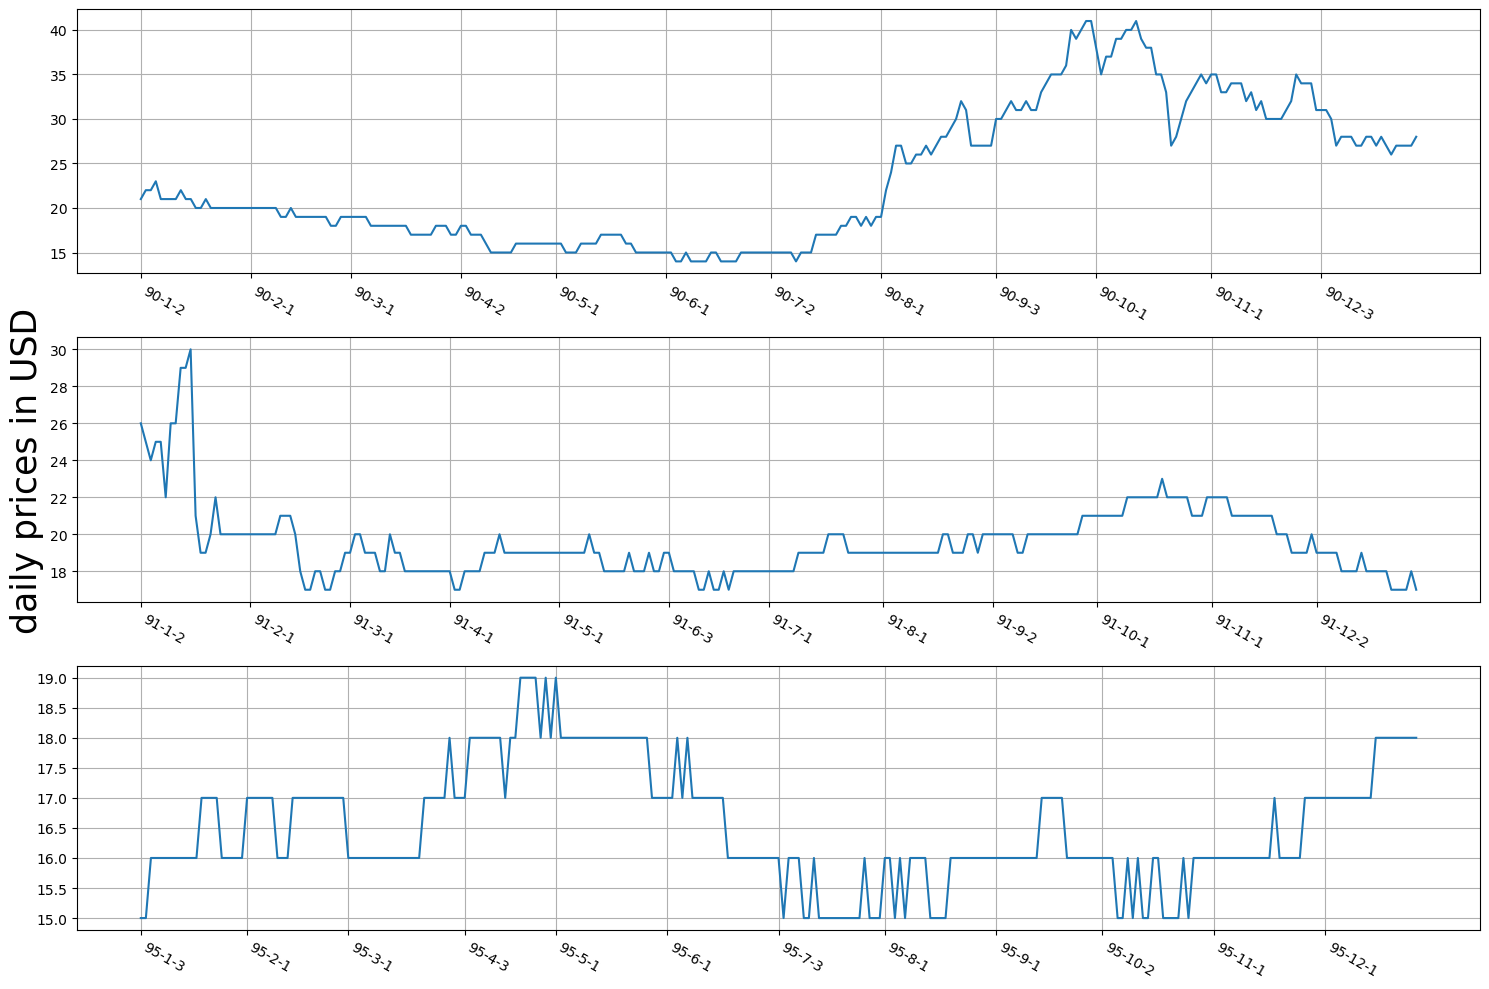

In [11]:
# 브렌트오일 가격 데이터 불러오기
data = bop_data_reader()
tyears_list = [90, 91, 95]

fig, axes = plt.subplots(len(tyears_list), 1, figsize=(15, 10))

for idx, ax in enumerate(axes.flat):
    bop_plot(data, tyears_list[idx], ax)
    
    if idx == 1:
        ax.set_ylabel('daily prices in USD', fontsize=25)
    
fig.tight_layout()

## 5) ax.axvline, ax.axhline
- 주로 기준선을 그어줄 때 사용한다.
- 2차적인 정보 전달이 목적이다.

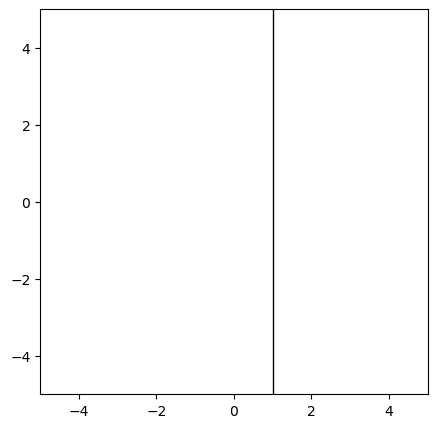

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.axvline(x=1, color='black', linewidth=1)

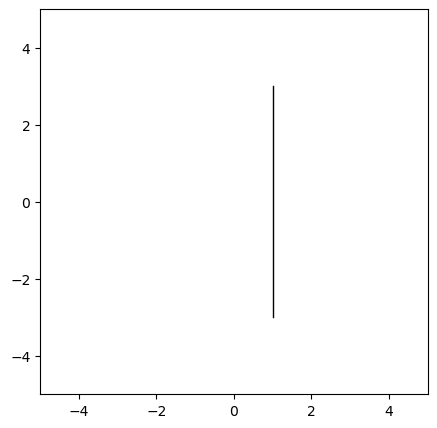

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.axvline(x=1, ymax=.8, ymin=.2, color='black', linewidth=1)

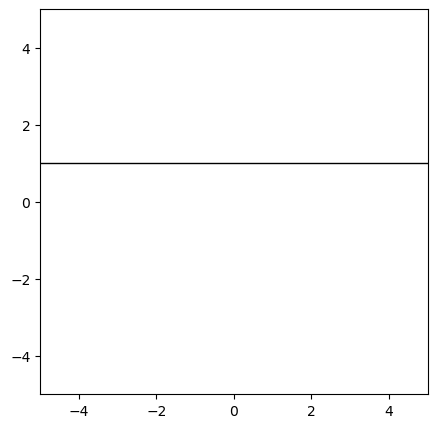

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.axhline(y=1, color='black', linewidth=1)

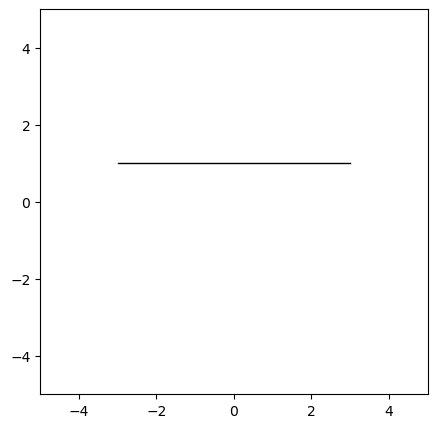

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.axhline(y=1, xmax=.8, xmin=.2, color='black', linewidth=1)

## 6) labels, legends
1. plot을 그리면서 label을 설정한다.
2. ax.legend 메서드를 실행한다.
- ax.legend 메서드의 매개변수
    - loc
    - ncol
- bbox_to_anchor

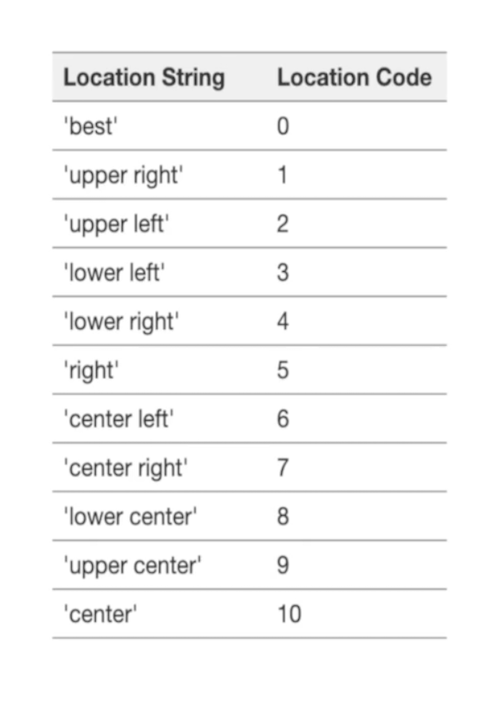

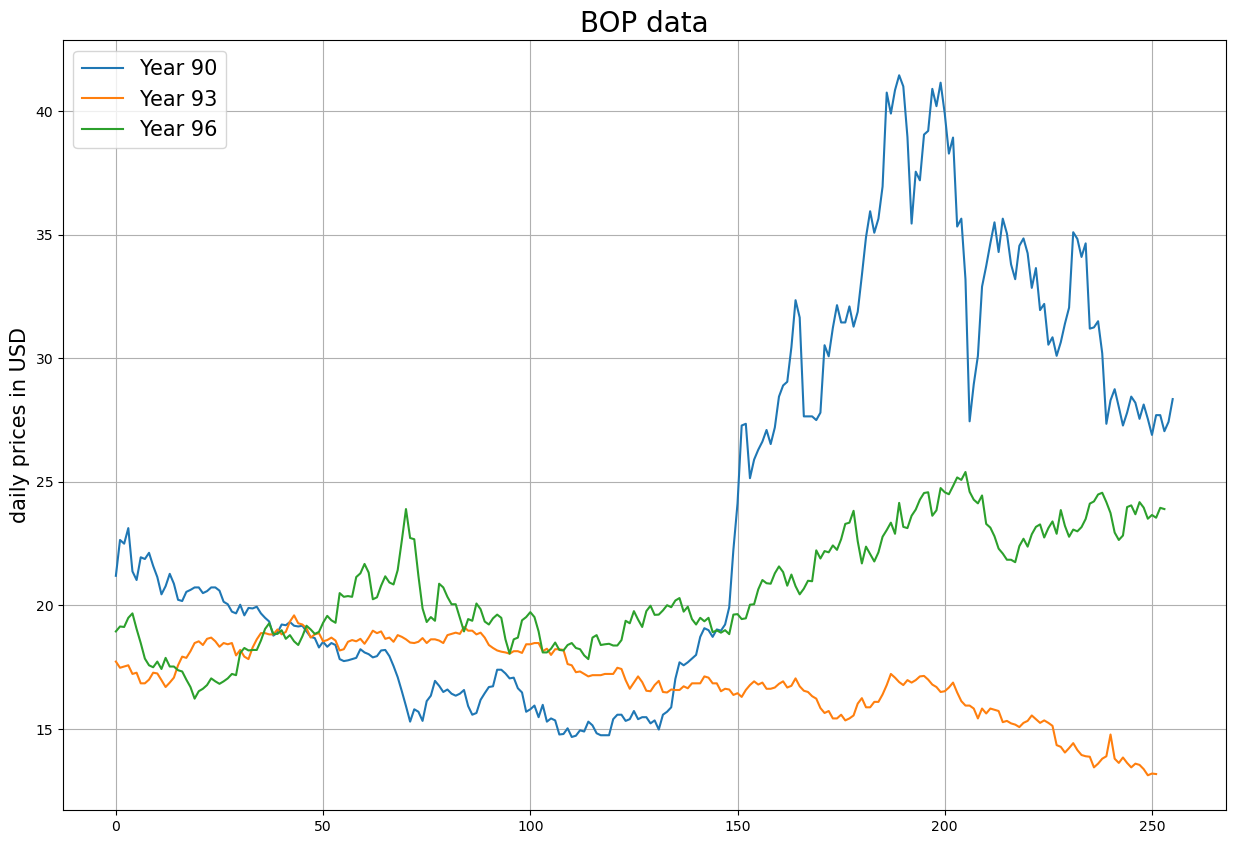

In [22]:
def bop_plot(dataset, tyear, ax):
    tyear_data = get_tyear_data(dataset, tyear)
    ax.plot(tyear_data[:, -1], label='Year '+str(tyear))
    
data = bop_data_reader()

fig, ax = plt.subplots(figsize=(15, 10))
bop_plot(data, 90, ax)
bop_plot(data, 93, ax)
bop_plot(data, 96, ax)

ax.set_title('BOP data', fontsize=20)
ax.set_ylabel('daily prices in USD', fontsize=15)
ax.tick_params(labelsize=10)
ax.grid()

ax.legend(fontsize=15, loc='upper left')

### bbox_to_anchor
기준점에 주의!

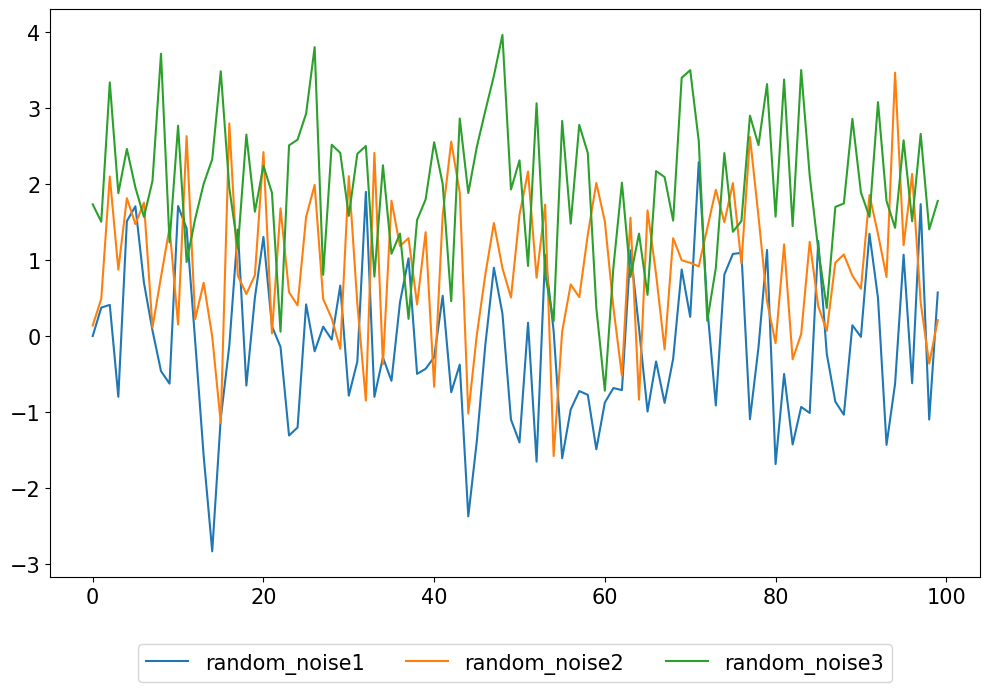

In [29]:
n_data = 100
random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 7))
ax.tick_params(labelsize=15)

ax.plot(random_noise1, label='random_noise1')
ax.plot(random_noise2, label='random_noise2')
ax.plot(random_noise3, label='random_noise3')

# ax.legend(fontsize=15, bbox_to_anchor=(1, .5), loc='center left')
# ax.legend(fontsize=15, bbox_to_anchor=(-.1, .5), loc='center right')
ax.legend(fontsize=15, bbox_to_anchor=(.5, -.1), loc='upper center', ncol=3)

fig.tight_layout()

Text(0, 0.5, 'daily prices in USD')

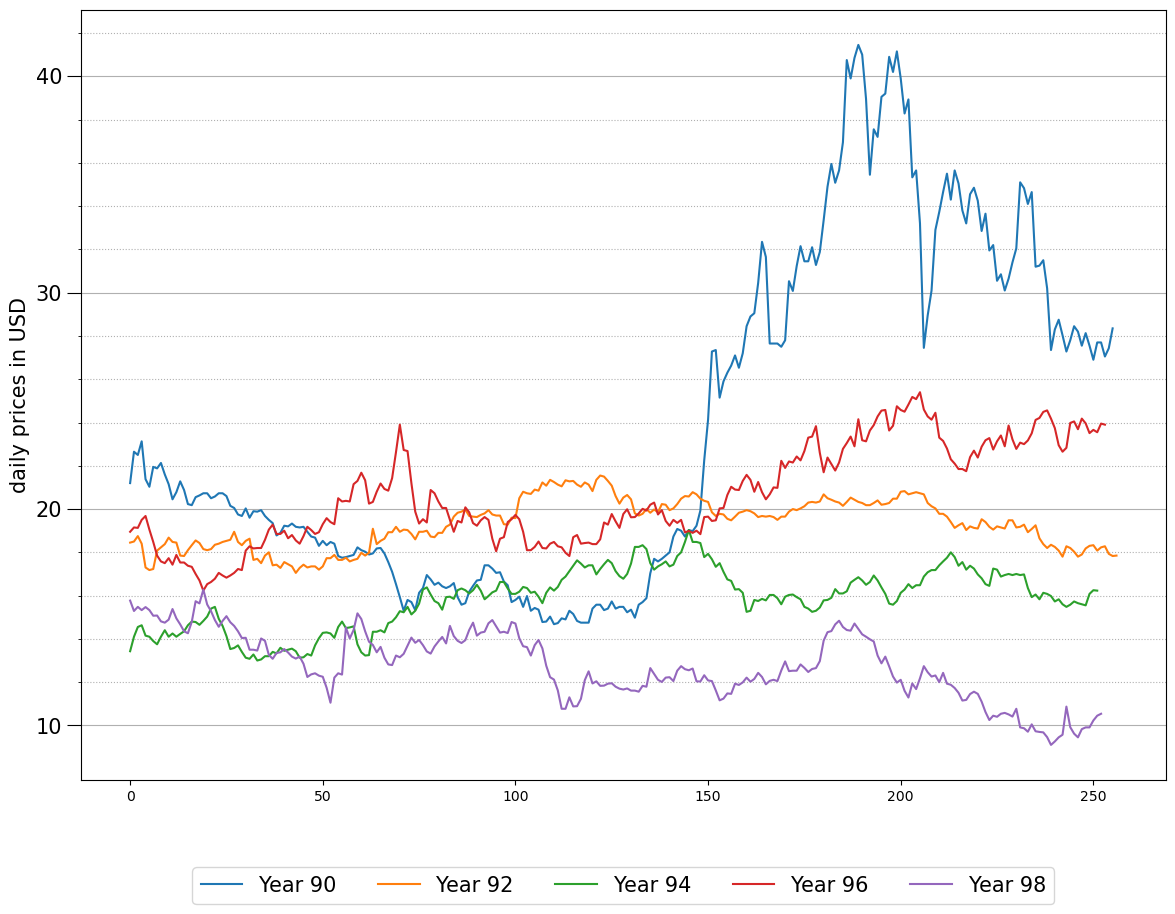

In [34]:
data = bop_data_reader()
tyear_list = [90, 92, 94, 96, 98]

fig, ax = plt.subplots(figsize=(14, 10))

for idx, tyear in enumerate(tyear_list):
    t_data = get_tyear_data(data, tyear)
    
    ax.plot(t_data[:, -1], label='Year '+ str(tyear))
    
# ax.legend(loc='upper left', fontsize=15)
ax.legend(bbox_to_anchor=(0.5, -.1), loc='upper center', ncol=len(tyear_list), fontsize=15)

major_yticks = np.arange(10, 41, 10)
minor_yticks = np.arange(10, 43, 2)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)
ax.tick_params(axis='y', length=10, labelsize=15)
ax.grid(axis='y', which='major')
ax.grid(axis='y', which='minor', linestyle=':')

ax.set_ylabel('daily prices in USD', fontsize=15)

## 7) line styles, markers
- line style, marker는 legend에 반영이 된다.

### line styles

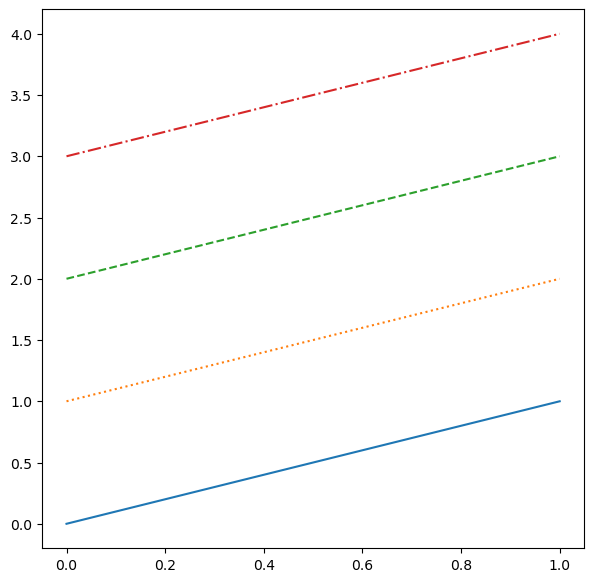

In [37]:
x_data = np.array([0, 1])
y_data = x_data

fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x_data, y_data)
ax.plot(x_data, y_data + 1, linestyle=':')
ax.plot(x_data, y_data + 2, linestyle='--')
ax.plot(x_data, y_data + 3, linestyle='-.')

### markers
- 수많은 marker 관련 속성이 존재한다.

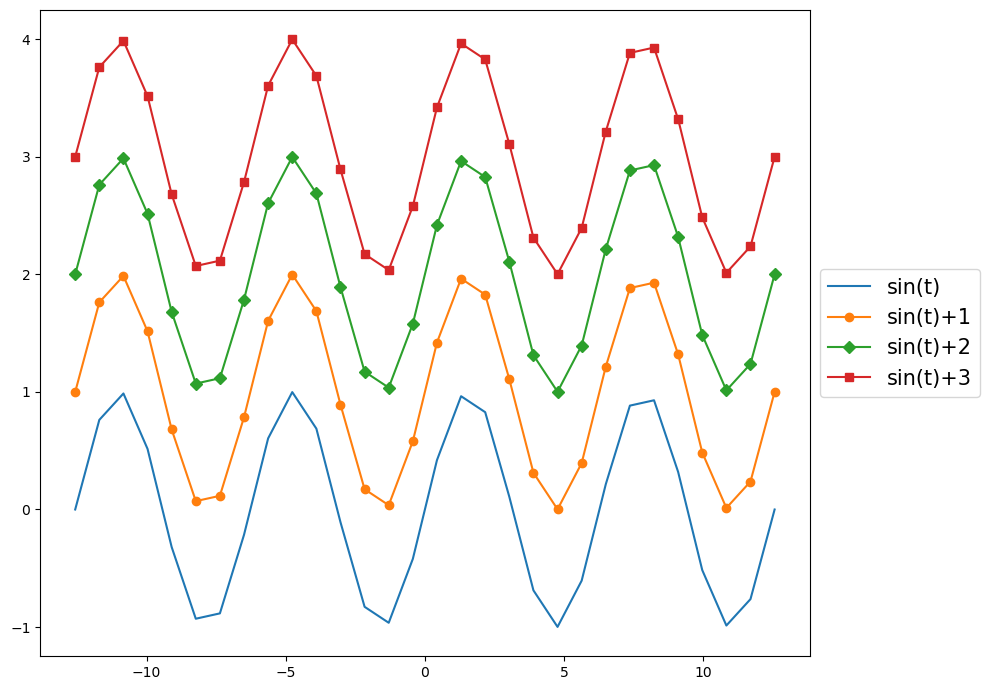

In [46]:
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 30)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(t, sin, label='sin(t)')
ax.plot(t, sin+1, label='sin(t)+1', marker='o')
ax.plot(t, sin+2, label='sin(t)+2', marker='D')
ax.plot(t, sin+3, label='sin(t)+3', marker='s')

ax.legend(loc='center left', bbox_to_anchor=(1, .5), fontsize=15)

fig.tight_layout()

### fmt argument
- [marker][color][linestyle]

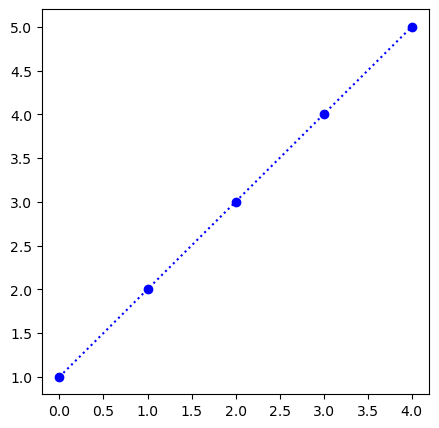

In [50]:
x_data = np.array([1, 2, 3, 4, 5])

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, linestyle=':', marker='o', color='b')
ax.plot(x_data, ':ob')

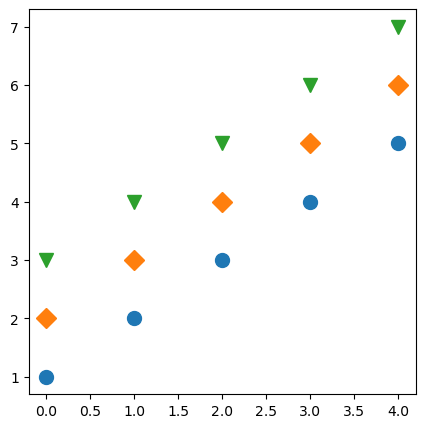

In [53]:
x_data = np.array([1, 2, 3, 4, 5])

fig, ax = plt.subplots(figsize=(5, 5))

# [marker]만 사용하겠다 = [linestyle][color]는 사용하지 않는다.
ax.plot(x_data, 'o', markersize=10)
ax.plot(x_data + 1, 'D', markersize=10)
ax.plot(x_data + 2, 'v', markersize=10)